In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw

In [ ]:
path = '/Users/chamathabeysinghe/Desktop/Images/100954431_707825396686749_3850178912851407986_n.jpg'

In [ ]:
# flags = cv2.INPAINT_TELEA
flags = cv2.INPAINT_NS

In [ ]:
image = cv2.imread(path)
image[400:570, 200:390, :] = 0
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
mask = np.zeros((image.shape[0], image.shape[1]))
mask[400:570, 200:390] = 1
mask = mask.astype(np.uint8)


In [ ]:
output = cv2.inpaint(image, mask, 5, flags=flags)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))


# Testing with real ant videos

In [2]:
def convert_video_to_frames(read_path):
    vidcap = cv2.VideoCapture(read_path)
    success, image = vidcap.read()
    count = 0
    frames = []
    while success:
        frames.append(image)
        success, image = vidcap.read()
#         print('Read a new frame: ', count)
        count += 1
    return frames


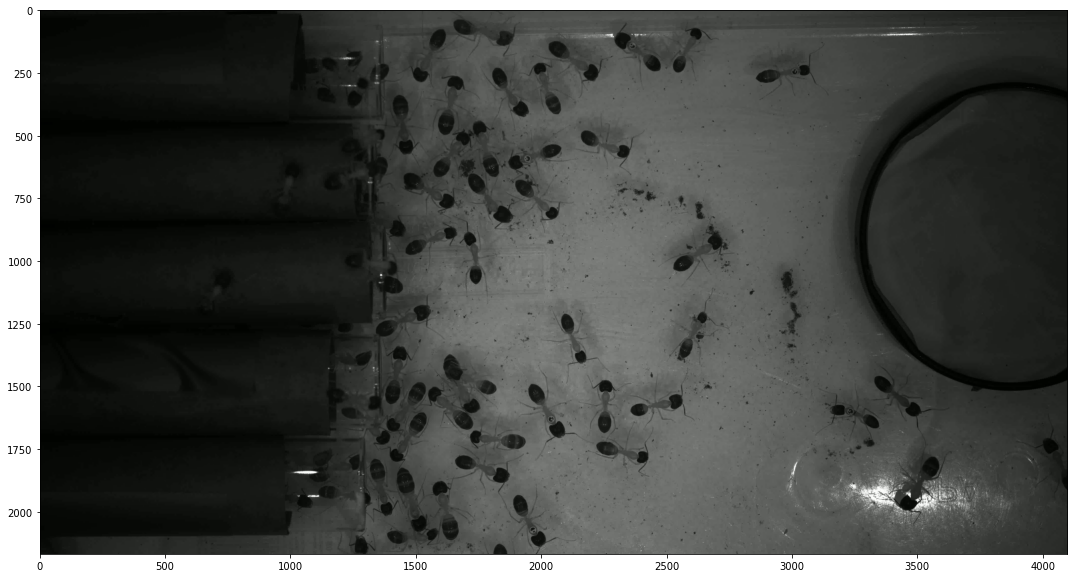

In [3]:
video_path = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/test/qr-tracking/qr_tracking.mp4'
frames = convert_video_to_frames(video_path)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))

In [6]:
track_data = np.genfromtxt('/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/test/qr-tracking/qr_tracking_v1.csv', delimiter=',')
track_data = track_data[track_data[:,1].argsort()]

In [10]:
def draw_dots(frame, x, y):    
    img = Image.fromarray(frame).convert('RGB')
    draw = ImageDraw.Draw(img)
    draw.ellipse([x-12, y-12, x + 12, y + 12], fill=(255, 0, 0))
    
    return np.asarray(img)

def draw_mask(mask, x, y):
    img = Image.fromarray(mask)
    draw = ImageDraw.Draw(img)
    draw.ellipse([x-12, y-12, x + 12, y + 12], fill=1)
    return np.asarray(img)



In [11]:
modified_frames = []
masks = []

for i in range(100):
    frame = cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB)
    mask = np.zeros((frame.shape[0], frame.shape[1]))
    x1,y1 = (int(track_data[i*2, 2]), int(track_data[i*2, 3]))
    x2,y2 = (int(track_data[i*2+1, 2]), int(track_data[i*2+1, 3]))
    frame = draw_dots(frame, x1, y1)
    mask = draw_mask(mask, x1, y1)
    frame = draw_dots(frame, x2, y2)
    mask = draw_mask(mask, x2, y2)
    modified_frames.append(frame)
    masks.append(mask.astype(np.uint8))
    

In [12]:
path_x = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/bernd/qr_removed/{}.png'
path_y = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/bernd/original/{}.png'
path_masks = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/bernd/masks/{}.png'

for i in range(100):
    if (i==0 or i == 50 or i == 99):
        frame = frames[i]
        flags = cv2.INPAINT_NS
        output = cv2.inpaint(cv2.cvtColor(modified_frames[i], cv2.COLOR_RGB2BGR), masks[i], 1, flags=flags)
        cv2.imwrite(path_x.format(i), output)
        cv2.imwrite(path_y.format(i), frame)
        cv2.imwrite(path_masks.format(i), modified_frames[i])
    

In [23]:
# plt.figure(figsize=(20,10))
# plt.imshow(modified_frames[4])
# plt.imshow(masks[4], cmap='gray')

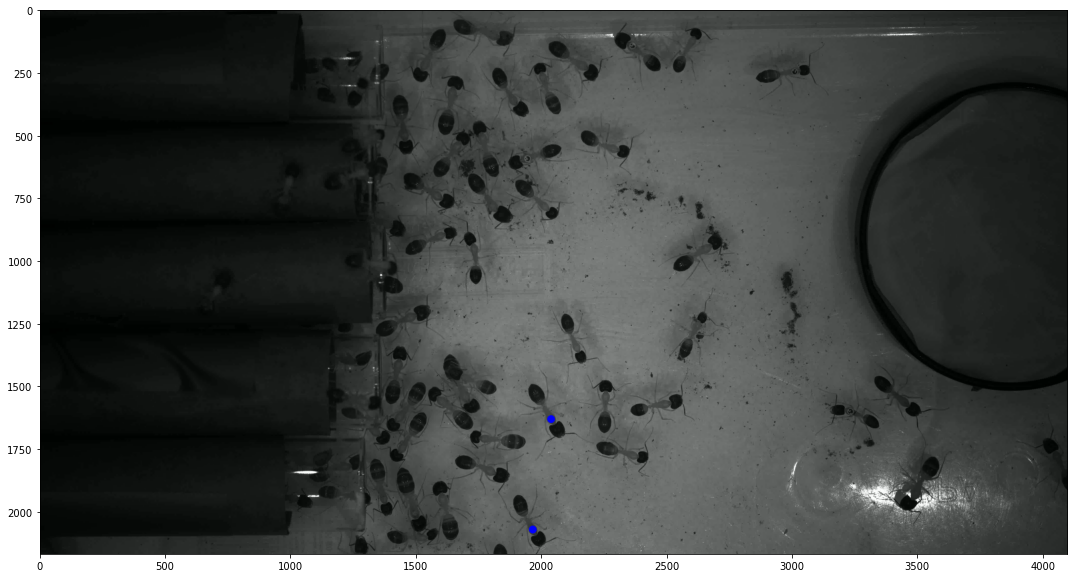

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(modified_frames[0], cv2.COLOR_RGB2BGR))

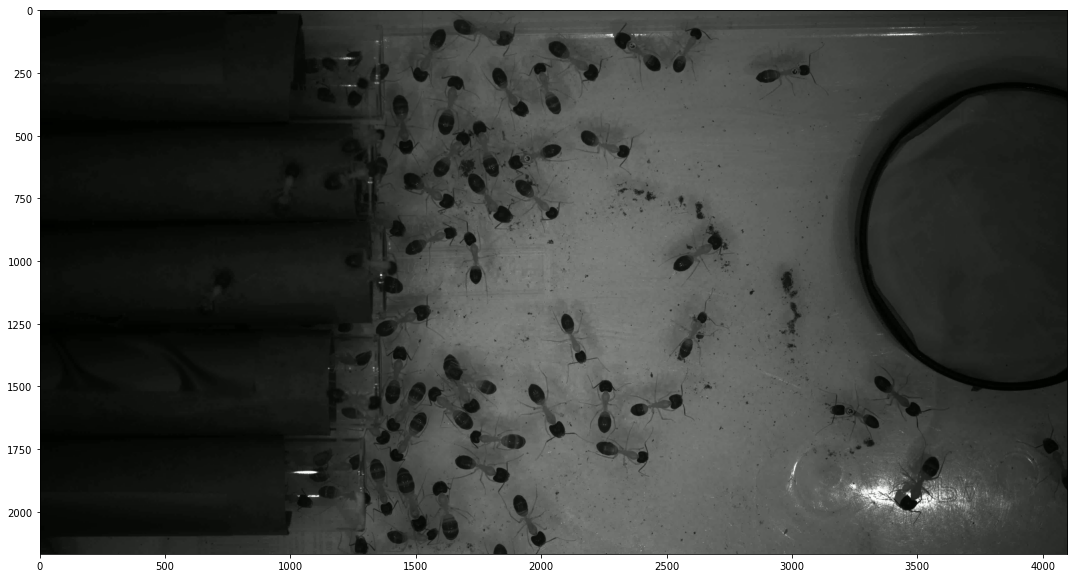

In [25]:
flags = cv2.INPAINT_NS
output = cv2.inpaint(cv2.cvtColor(modified_frames[0], cv2.COLOR_RGB2BGR), masks[0], 1, flags=flags)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
